In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Import master dataframe
master_cleaned_df = pd.read_csv('master_cleaned.csv')
master_cleaned_df

,original_title,year,genres,numvotes,averagerating,production_budget,domestic_gross,worldwide_gross
0,The Legend of Hercules,2014,"Action,Adventure,Fantasy",50352,4.2,70000000,18848538,58953319
1,Baggage Claim,2013,Comedy,8296,5.1,8500000,21569509,22885836
2,Moneyball,2011,"Biography,Drama,Sport",326657,7.6,50000000,75605492,111300835
3,Hereafter,2010,"Drama,Fantasy,Romance",87288,6.5,50000000,32746941,108660270
4,21 Jump Street,2012,"Action,Comedy,Crime",477771,7.2,42000000,138447667,202812429
...,...,...,...,...,...,...,...,...
1301,How to Train Your Dragon: The Hidden World,2019,"Action,Adventure,Animation",60769,7.6,129000000,160791800,519258283
1302,Game Night,2018,"Action,Comedy,Crime",163279,7.0,37000000,69179066,117378084
1303,The Sleepwalker,2014,Drama,632,4.9,1100000,2636,2636
1304,A Hologram for the King,2016,"Comedy,Drama,Romance",36062,6.1,35000000,4212494,11846010


In [3]:
'''
For knowledge: How many specific genres belong to movies?
'''
'''
1.1.1. First, we split the genre for each movie title.
'''
genre_split_df = master_cleaned_df.assign(genres = master_cleaned_df['genres'].str.split(',')).explode('genres')

'''
1.1.2. Next, we create a smaller dataframe by grouping the genres and sum the movie title.
'''
genre_df = (pd.DataFrame(genre_split_df.groupby('genres', as_index = False).original_title.nunique())).sort_values(
    by = 'original_title', ascending = False).reset_index(drop = True)

'''
1.1.3 We can also check the year range from the master_cleaned_df
'''
print(max(master_cleaned_df.year), min(master_cleaned_df.year))

genre_df

2019 2010


,genres,original_title
0,Drama,640
1,Comedy,463
2,Action,396
3,Adventure,327
4,Thriller,227
5,Crime,205
6,Romance,173
7,Horror,140
8,Biography,128
9,Sci-Fi,122


Text(0.0, 1.0, 'Genres belonging to movies made from 2010 - 2019')

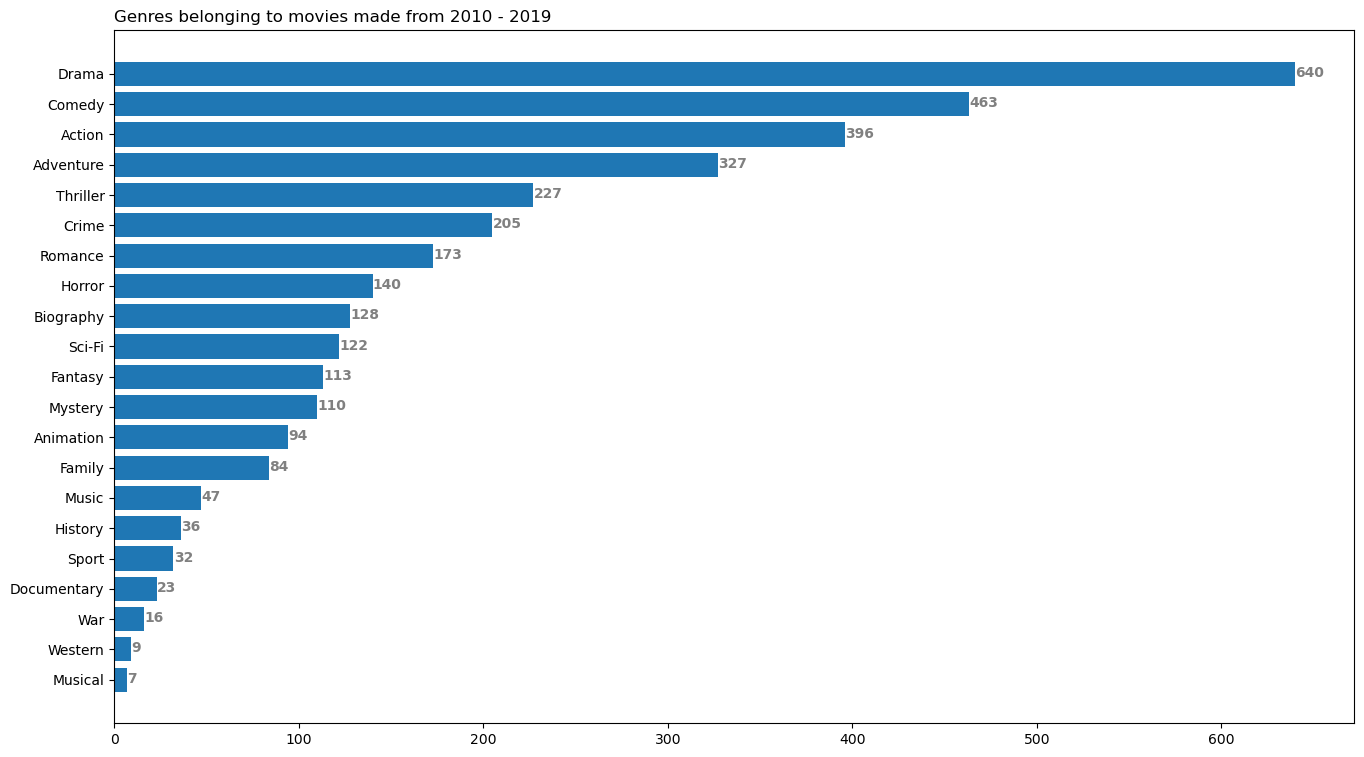

In [4]:
'''
'Genres belonging to movies made from 2010 - 2019'
'''
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(genre_df.genres, genre_df.original_title)

ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

ax.set_title('Genres belonging to movies made from 2010 - 2019',
             loc ='left', )

In [5]:
'''
To make a comprehensive analysis of the cleaned data, 
we are going to expand the dataframe by adding more columns
'''
'''
Lets find out the min and max ratings to create a 'popularity' column
'''

'''
lets add new columns to explore movie profitabilities.

Movie Profitability columns:
'''

def create_profit_columns(x):

    x['d.profit'] = master_cleaned_df['domestic_gross'] - master_cleaned_df['production_budget']
    x['d.profit_status'] = np.where(x['d.profit'] > 0, "Profit", "Not-Profit")
    x['w.profit'] = master_cleaned_df['worldwide_gross'] - master_cleaned_df['production_budget'] 
    x['w.profit_status'] = np.where(x['w.profit'] > 0, "Profit", "Not-Profit")
   
    return x

master_movie_df = create_profit_columns(master_cleaned_df)


In [6]:
'''
Next, find out the min and max ratings to create a 'popularity' column
'''

print('Min Ratings: ', min(master_movie_df['averagerating']), '\nMax Ratings: ', max(master_movie_df['averagerating']))

conditions = [
(master_movie_df['averagerating'] <=4),
((master_movie_df['averagerating'] >4) & (master_movie_df['averagerating'] <=6)),
(master_movie_df['averagerating'] >6)
]

results = ['Good', 'Average', 'Bad']


master_movie_df['popularity'] = np.select(conditions, results)
master_movie_df.head()

Min Ratings:  1.6 
Max Ratings:  8.8


,original_title,year,genres,numvotes,averagerating,production_budget,domestic_gross,worldwide_gross,d.profit,d.profit_status,w.profit,w.profit_status,popularity
0,The Legend of Hercules,2014,"Action,Adventure,Fantasy",50352,4.2,70000000,18848538,58953319,-51151462,Not-Profit,-11046681,Not-Profit,Average
1,Baggage Claim,2013,Comedy,8296,5.1,8500000,21569509,22885836,13069509,Profit,14385836,Profit,Average
2,Moneyball,2011,"Biography,Drama,Sport",326657,7.6,50000000,75605492,111300835,25605492,Profit,61300835,Profit,Bad
3,Hereafter,2010,"Drama,Fantasy,Romance",87288,6.5,50000000,32746941,108660270,-17253059,Not-Profit,58660270,Profit,Bad
4,21 Jump Street,2012,"Action,Comedy,Crime",477771,7.2,42000000,138447667,202812429,96447667,Profit,160812429,Profit,Bad


In [7]:
'''
Is making movies profitable?
'''
'''
Profits based on Domestic Gross
'''
print(master_movie_df.groupby('d.profit_status', as_index= False).original_title.nunique())
'''
Profits based on Worldwide Gross
'''
print(master_movie_df.groupby('w.profit_status', as_index= False).original_title.nunique())

  d.profit_status  original_title
0      Not-Profit             622
1          Profit             683
  w.profit_status  original_title
0      Not-Profit             283
1          Profit            1023


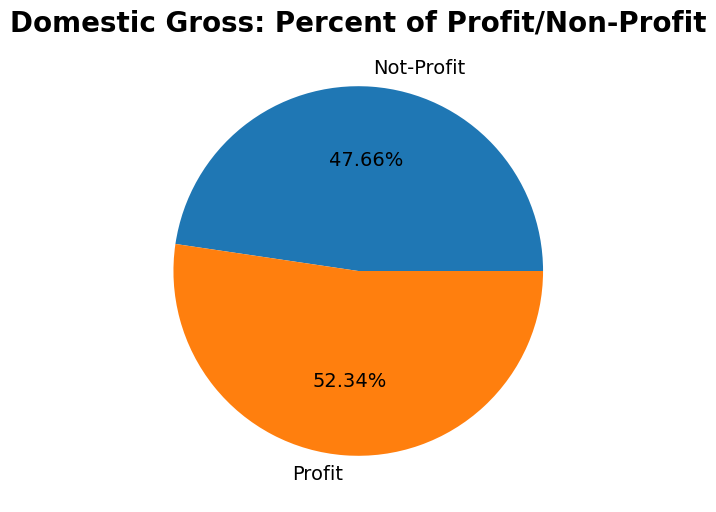

In [8]:
'''
Profits based on Domestic Gross: Pie Chart 
'''

domestic_profit = master_movie_df.groupby("d.profit_status").nunique().reset_index()
    
    
pie, ax = plt.subplots(figsize=[10,6])
labels = domestic_profit['d.profit_status']

plt.pie(x=domestic_profit.original_title, autopct="%.2f%%", labels=labels, textprops={'fontsize': 14})
plt.title("Domestic Gross: Percent of Profit/Non-Profit", fontsize=20, weight = 'bold');

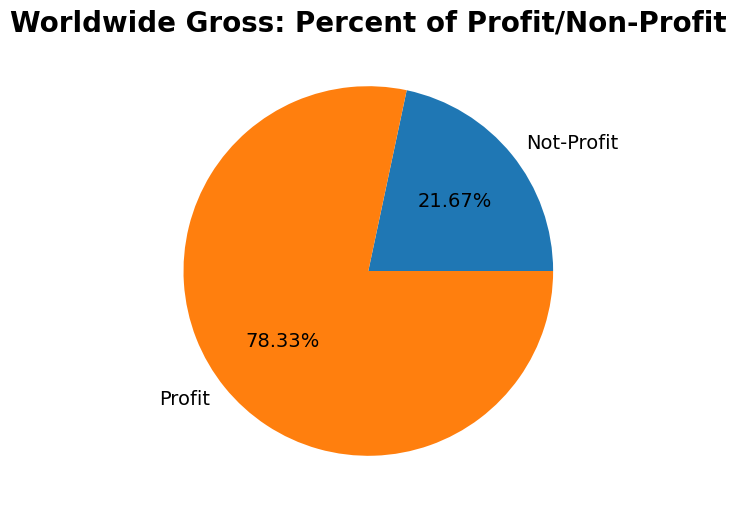

In [9]:
'''
Profits based on Worldwide Gross: Pie Chart
'''

worldwide_profit = master_movie_df.groupby("w.profit_status").nunique().reset_index()
    
    
pie, ax = plt.subplots(figsize=[10,6])
labels = worldwide_profit['w.profit_status']

plt.pie(x=worldwide_profit.original_title, autopct="%.2f%%", labels=labels, textprops={'fontsize': 14})
plt.title("Worldwide Gross: Percent of Profit/Non-Profit", fontsize=20, weight = 'bold');


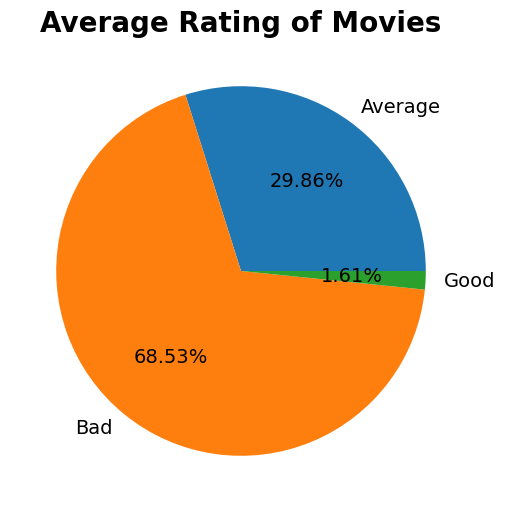

In [10]:
'''
Overall making movies can be profitable, but to ensure continued success of our future movie studio,
we should consider how movies are rated.

Movie popularity:
'''
popularity = master_movie_df.groupby("popularity").nunique().reset_index()
    
    
pie, ax = plt.subplots(figsize=[10,6])
labels = popularity['popularity']

plt.pie(x=popularity.original_title, autopct="%.2f%%", labels=labels, textprops={'fontsize': 14})
plt.title("Average Rating of Movies", fontsize=20, weight = 'bold');

In [11]:
'''
From the chart, 'Average Ratings of Movies',
We find that most movies made were bad, and only less than 2% is considered good
To find out what makes a good movie, we analyze the top 10 most successfull movies

Top 10 Highest Grossing Movies 2010 - 2019:
'''

top_10_gross = master_movie_df.sort_values(by = 'worldwide_gross', ascending = False)
        
top_10_gross = top_10_gross.head(10)
        
        #df = df.groupby('genres').sum().sort_values(by = 'worldwide_gross', ascending = False).reset_index()
        
        #return df
        
top_10_gross.head()

,original_title,year,genres,numvotes,averagerating,production_budget,domestic_gross,worldwide_gross,d.profit,d.profit_status,w.profit,w.profit_status,popularity
1280,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",670926,8.5,300000000,678815482,2048134200,378815482,Profit,1748134200,Profit,Bad
173,Jurassic World,2015,"Action,Adventure,Sci-Fi",539338,7.0,215000000,652270625,1648854864,437270625,Profit,1433854864,Profit,Bad
851,The Avengers,2012,"Action,Adventure,Sci-Fi",1183655,8.1,225000000,623279547,1517935897,398279547,Profit,1292935897,Profit,Bad
1181,Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi",665594,7.3,330600000,459005868,1403013963,128405868,Profit,1072413963,Profit,Bad
220,Black Panther,2018,"Action,Adventure,Sci-Fi",516148,7.3,200000000,700059566,1348258224,500059566,Profit,1148258224,Profit,Bad


In [12]:
'''
Which specific genre is most common?
'''
genres = top_10_gross.groupby("genres").nunique().reset_index()
'''
First, we split the genre for each movie title.
'''
genre_top10_df = top_10_gross.assign(genres = top_10_gross['genres'].str.split(',')).explode('genres')

'''
Next, we create a smaller dataframe by grouping the genres and sum the movie title.
'''
genre_top10_df = (pd.DataFrame(genre_top10_df.groupby('genres', as_index = False).original_title.nunique())).sort_values(
    by = 'original_title', ascending = False).reset_index(drop = True)

'''
Genre Combinations:
'''
genres = top_10_gross.groupby("genres").nunique().reset_index()



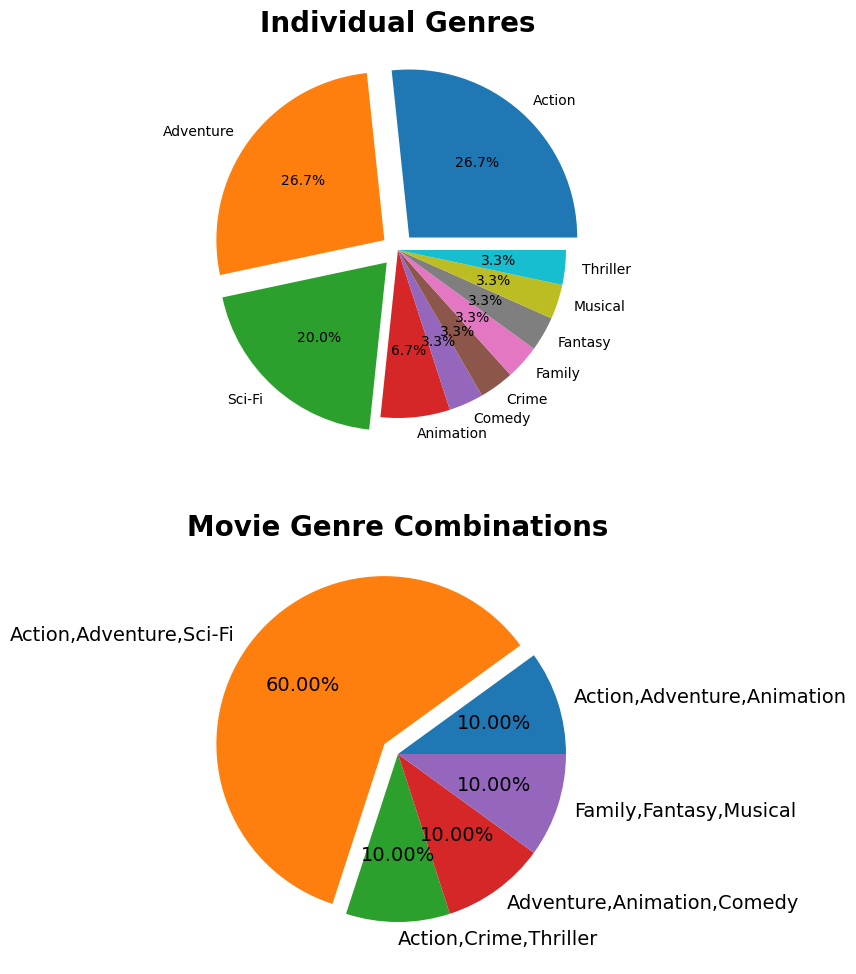

In [13]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(20,12)) #ax1,ax2 refer to your two pies

# 1,2 denotes 1 row, 2 columns - if you want to stack vertically, it would be 2,1


labels1 = genre_top10_df['genres']
title1 = 'Individual Genres'
labels2 = genres['genres']
title2 = "Movie Genre Combinations"
explode1 = [0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0]
explode2 = [0, 0.1, 0, 0, 0]

ax1.pie(x=genre_top10_df.original_title, autopct= "%.1f%%" , labels=labels1, textprops={'fontsize': 10}, explode = explode1)
ax1.set_title(title1, loc ='center', fontsize = 20, fontweight = 'bold' )


ax2.pie(x=genres.original_title, autopct="%.2f%%", labels=labels2, textprops={'fontsize': 14}, explode = explode2)
ax2.set_title(title2, loc ='center', fontsize = 20, fontweight = 'bold' );





    


Average Gross: $ 1428100654.1


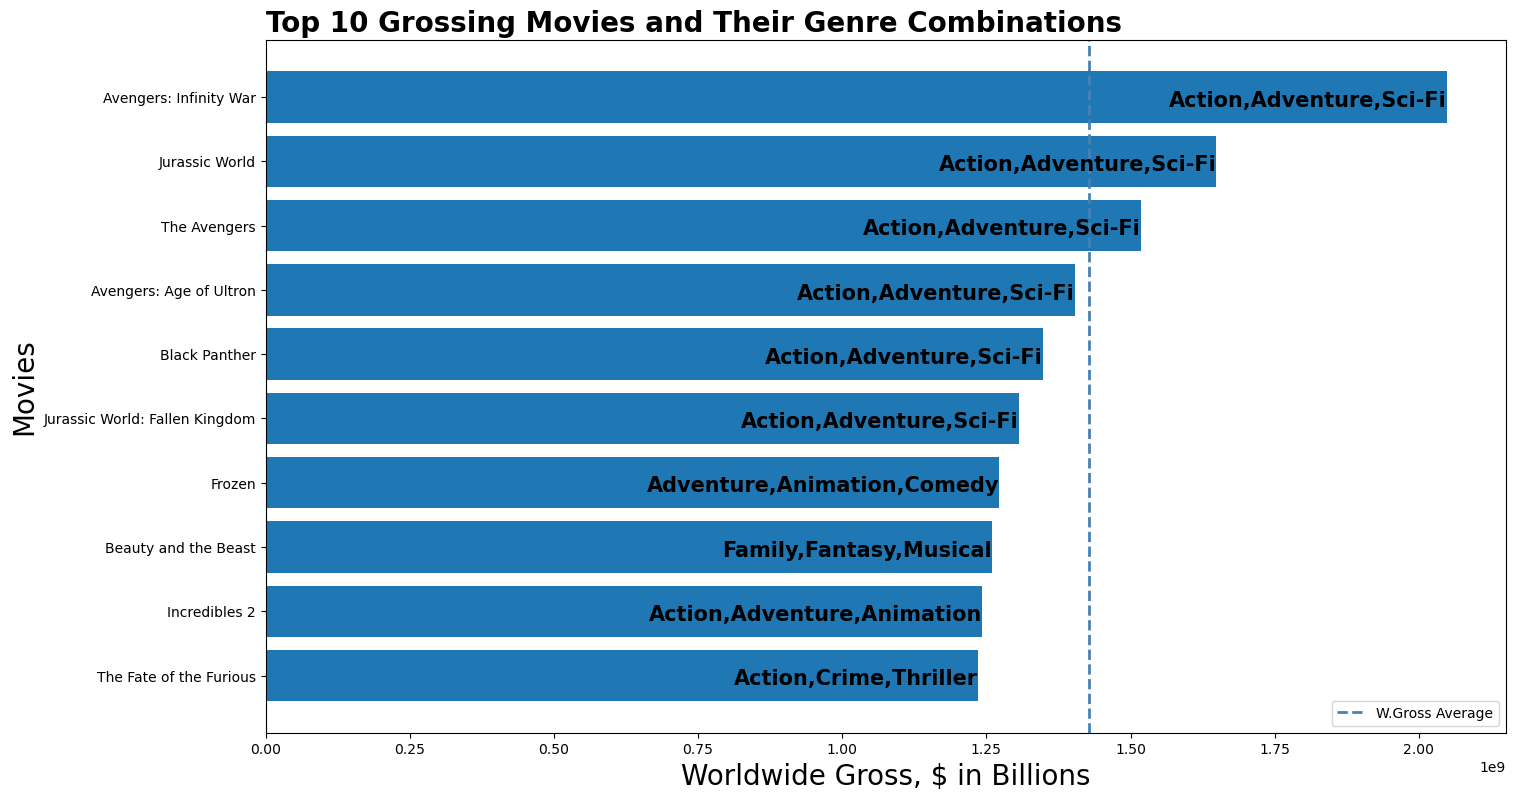

In [14]:
'''
Let find out their worldwide gross and which combination of genre they belong to,
'''
fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111) 
        
ax.barh(top_10_gross.original_title, top_10_gross.worldwide_gross)

        
ax.set_ylabel('Movies', fontsize = 20)  
ax.set_xlabel('Worldwide Gross, $ in Billions', fontsize = 20)

ax.set_title('Top 10 Grossing Movies and Their Genre Combinations',loc ='left', fontsize = 20, fontweight = 'bold' ) 

txt = []
for g in top_10_gross['original_title'].unique():
    tmp = top_10_gross[top_10_gross['original_title']==g]['genres']
    txt.append(tmp.tolist())
    
txt = sum(txt, [])

for t,b in zip(txt, ax.patches):
    ax.annotate(t,
                   (b.get_width() , b.get_y() +  b.get_height()),
                   ha = 'right', va = 'bottom',
                   xytext = (0, 9),
                   textcoords = 'offset points', fontsize = 15, fontweight ='bold')
    
ax.axvline(top_10_gross.worldwide_gross.mean(), color='steelblue', linestyle = 'dashed', linewidth=2, label = 'W.Gross Average')

ax.legend()
ax.invert_yaxis()

print('Average Gross: $', top_10_gross.worldwide_gross.mean())

W.Gross Average: $ 1428100654.1 
D.Gross Average: $ 527024953.1 
Average Budget: $ 220060000.0


C:\Users\zhesh\AppData\Local\Temp\ipykernel_11656\1963851267.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), ha = 'right', rotation=45, fontsize = 10)


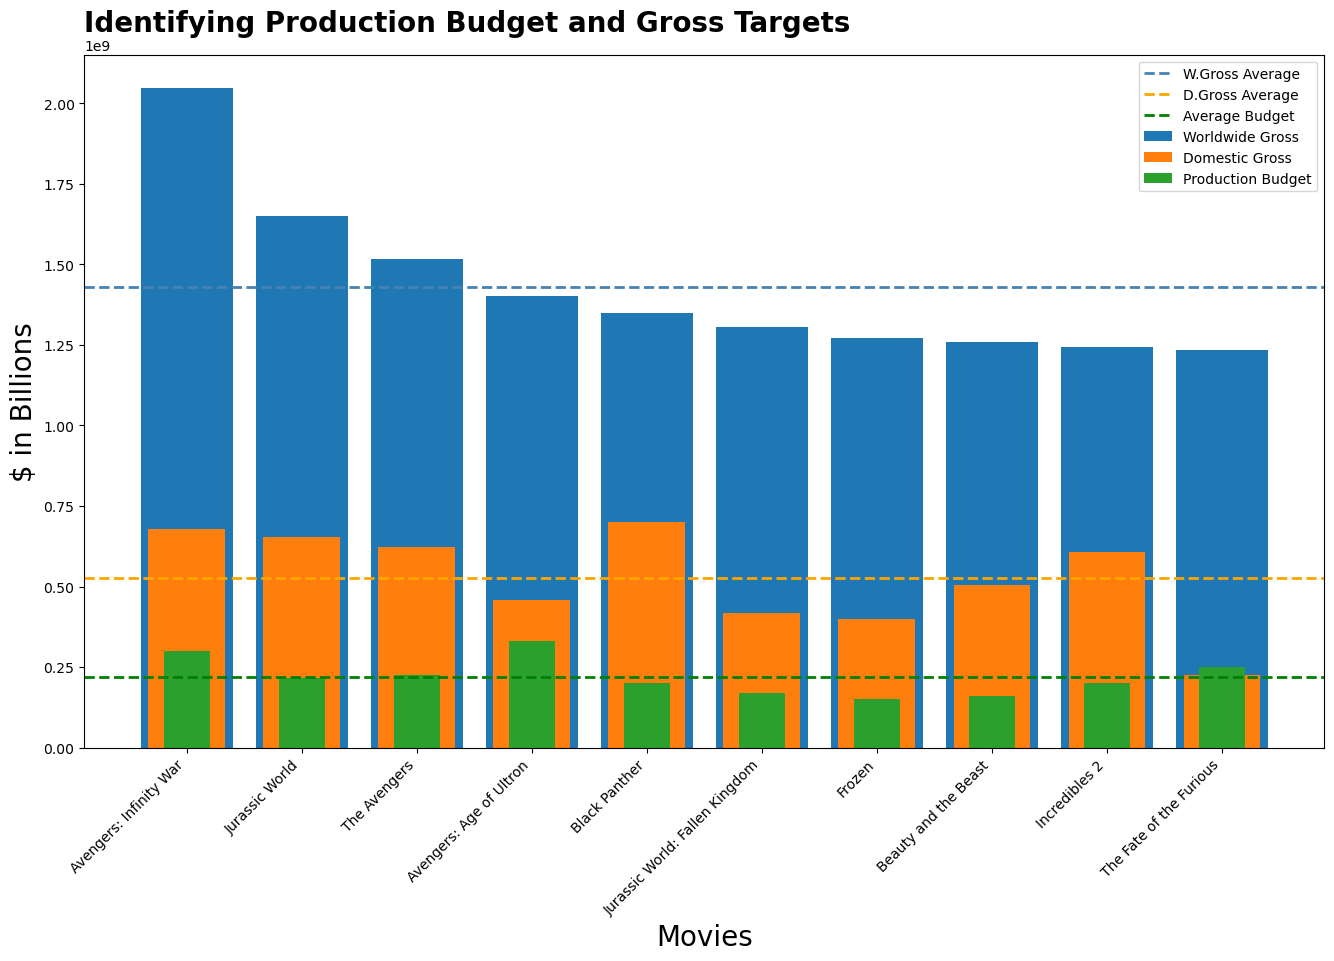

In [15]:
'''
Lets find out their gross and budgets
'''

fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)
ax.bar(x=top_10_gross.original_title, 
       height=top_10_gross.worldwide_gross,align='center', label = 'Worldwide Gross')

ax.bar(x=top_10_gross.original_title, 
       height=top_10_gross.domestic_gross, width=1/1.5,  align='center', label = 'Domestic Gross')

ax.bar(x=top_10_gross.original_title, 
       height=top_10_gross.production_budget, width=1/2.5,  align='center', label = 'Production Budget')

ax.set_xlabel('Movies', fontsize = 20)  
ax.set_ylabel('$ in Billions', fontsize = 20)

ax.set_xticklabels(ax.get_xticklabels(), ha = 'right', rotation=45, fontsize = 10)

ax.set_title('Identifying Production Budget and Gross Targets', fontsize =20, loc ='left', fontweight = 'bold' )

ax.axhline(top_10_gross.worldwide_gross.mean(), color='steelblue', linestyle = 'dashed', linewidth=2, label = 'W.Gross Average')
ax.axhline(top_10_gross.domestic_gross.mean(), color='orange', linestyle = 'dashed', linewidth=2, label = 'D.Gross Average')
ax.axhline(top_10_gross.production_budget.mean(), color='green', linestyle = 'dashed', linewidth=2, label = 'Average Budget')

ax.legend();

print('W.Gross Average: $',top_10_gross.worldwide_gross.mean(),
     '\nD.Gross Average: $',top_10_gross.domestic_gross.mean(),
     '\nAverage Budget: $',top_10_gross.production_budget.mean(),)
